<a href="https://colab.research.google.com/github/Mokaba23/Data-science-portfolio/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

**Reading the data in**

In [2]:
data = pd.read_csv('/content/sample_data/MY2022 Fuel Consumption Ratings.csv')
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [5]:
df = data[['Engine Size(L)','Cylinders','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))','CO2 Emissions(g/km)']]
df.head()

,Engine Size(L),Cylinders,Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km)
0,2.4,4,7.0,8.6,200
1,3.5,6,9.4,11.2,263
2,2.0,4,8.6,9.9,232
3,2.0,4,9.1,10.3,242
4,2.0,4,8.0,9.8,230


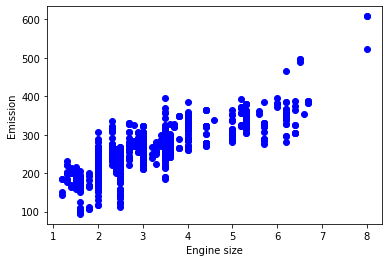

In [6]:
plt.scatter(df['Engine Size(L)'],df['CO2 Emissions(g/km)'],color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


**Train data distribution**

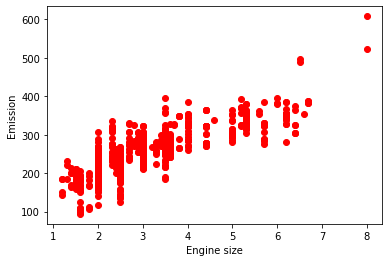

In [8]:
plt.scatter(train['Engine Size(L)'],train['CO2 Emissions(g/km)'], color = 'red')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

**Multiple Regression Model**

In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.



In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
x = np.asanyarray(train[['Engine Size(L)','Cylinders','Fuel Consumption(Hwy (L/100 km))']])
y = np.asanyarray(train[['CO2 Emissions(g/km)']])

reg.fit(x,y)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [[ 2.81591506  8.8437132  19.86828347]]
Intercept: [14.18595485]


As mentioned before, Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.



**Prediction**

In [12]:
yhat = reg.predict(test[['Engine Size(L)','Cylinders','Fuel Consumption(Hwy (L/100 km))']])
x = np.asanyarray(test[['Engine Size(L)','Cylinders','Fuel Consumption(Hwy (L/100 km))']])
y = np.asanyarray(test[['CO2 Emissions(g/km)']])

reg.fit(x,y)

print('Residual sum of squares: %.2f' % np.mean((yhat - y)** 2))
print('Variance score: %.2f' % reg.score(x,y))

Residual sum of squares: 69586.41
Variance score: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
